In [1]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "1.8.0_181"
OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-1ubuntu0.18.04.1-b13)
OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)


In [ ]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
base_dir = os.path.join(os.path.join(os.path.join(os.getcwd(),'drive'),'My Drive/Colab Notebooks/'),'stanford-corenlp-full-2018-10-05.zip')

In [ ]:
from nltk.parse import stanford

In [ ]:
#model = '/home/bhoomika/stanford/stanford-postagger-full-2018-10-16/models/english-left3words-distsim.tagger'

parser_jar = os.path.join(os.path.join(os.path.join(os.getcwd(),'drive'),'My Drive/'),'Colab Notebooks/stanford-parser-full-2018-10-17/stanford-parser.jar')
parser_model = os.path.join(os.path.join(os.path.join(os.getcwd(),'drive'),'My Drive/'),'Colab Notebooks/stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar')

In [ ]:
parser = stanford.StanfordParser(parser_model, parser_jar, encoding='utf8')

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk


In [ ]:
sentences = parser.raw_parse_sents(sent_tokenize("Excellent hotel in the heart of Chicago. The room we stayed in had a great view of Lake Michigan. We went in July for a vacation and everything is easily accesible from the hotel. Most major attractions are in around the Loop area. We also got a great deal on the price. I would recommend this hotel to anyone visiting Chicago - its in the right spot for both business and pleasure."))

In [15]:
nltk.download('punkt')
sent_tokenize("Hello my name is shivam. This is standford tut here. Lets begin")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello my name is shivam.', 'This is standford tut here.', 'Lets begin']

In [ ]:
ROOT="ROOT"
def getNodes(parent):
    for node in parent:
        if type(node) is nltk.Tree:
            #if node.label() == ROOT:
            #    print("======== Sentence =========")
            #    print("Sentence:", " ".join(node.leaves()))
            #else:
            print("Label:", node.label())
            #    print("Leaves:", node.leaves())

            getNodes(node)
        #else:
        #    print("Word:", node)

In [18]:
for line in sentences:
        for sentence in line:
          sentence.pretty_print()            

                        ROOT                              
                         |                                 
                         NP                               
            _____________|______________________________   
           |             PP                 PP          | 
           |          ___|____           ___|_____      |  
           NP        |        NP        |         NP    | 
     ______|____     |    ____|____     |         |     |  
    JJ          NN   IN  DT        NN   IN       NNP    . 
    |           |    |   |         |    |         |     |  
Excellent     hotel  in the      heart  of     Chicago  . 

                                    ROOT                                     
                                     |                                        
                                     S                                       
               ______________________|_____________________________________   
              NP               

In [ ]:
t = next(next(sentences))

In [12]:
type(t)

nltk.tree.Tree

In [ ]:
#print(t)

In [17]:
t.pretty_print()

                                                                                                                                                                                                                                                           ROOT                                                                                                                                                                                                                                 
                                                                                                                                                                                                                                                            |                                                                                                                                                                                                                                    
                                     

In [ ]:
getNodes(t)

Label: S
Label: S
Label: INTJ
Label: UH
Label: NP
Label: PRP$
Label: NN
Label: VP
Label: VBZ
Label: NP
Label: NP
Label: NNP
Label: .
Label: SBAR
Label: S
Label: NP
Label: DT
Label: VP
Label: VBZ
Label: VP
Label: VBN
Label: NP
Label: NN
Label: ADVP
Label: RB
Label: .
Label: NP
Label: NNP
Label: VP
Label: VBP
Label: .


In [ ]:
import networkx as nx

In [ ]:
g = nx.Graph()

In [ ]:
g.add_edges_from([('S','NP'),('NP','VP'),('S','NP'),("S","VP")])

In [ ]:
import matplotlib.pyplot as plt

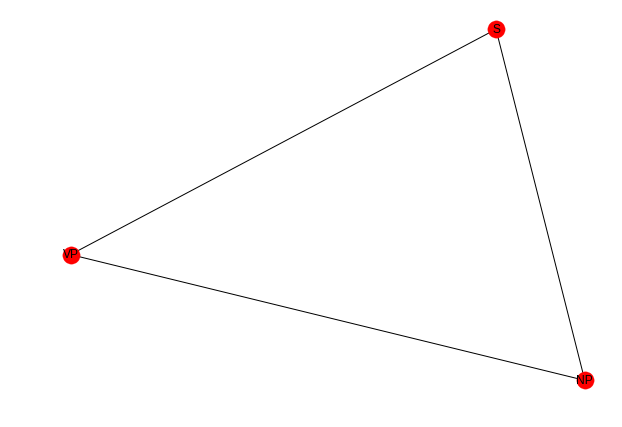

In [23]:
nx.draw(g,with_labels=True)
plt.show()